# Model Initialization 

In [1]:
import numpy as np
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
classifier = Sequential()
classifier.add(Convolution2D(32, (3,3),strides= (3,3), input_shape=(1000,1000,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Convolution2D(32, (3,3),strides= (3,3), input_shape=(1000,1000,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Convolution2D(32, (3,3),strides= (3,3), input_shape=(1000,1000,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())

classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 333, 333, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 166, 166, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 55, 55, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

# Preprocessing 

In [3]:
X = np.ones((253, 512))

In [4]:
i = 0

In [5]:
os.chdir('D:/Kuliah baru/SMT 7/Coba/Brain Tumor Dataset/brain_tumor_output/train/yes')
for filename in os.listdir("D:/Kuliah baru/SMT 7/Coba/Brain Tumor Dataset/brain_tumor_output/train/yes"):
    img = cv2.imread(filename)
    img = cv2.resize(img,(1000,1000))
    img = np.divide(img,255)
    img = img.reshape(1,1000,1000,3)
    X[i] = classifier.predict(img)
    i = i + 1

In [6]:
os.chdir('D:/Kuliah baru/SMT 7/Coba/Brain Tumor Dataset/brain_tumor_output/train/no')
for filename in os.listdir("D:/Kuliah baru/SMT 7/Coba/Brain Tumor Dataset/brain_tumor_output/train/no"):
    img = cv2.imread(filename)
    img = cv2.resize(img,(1000,1000))
    img = np.divide(img,255)
    img = img.reshape(1,1000,1000,3)
    X[i] = classifier.predict(img)
    i = i + 1

In [7]:
os.chdir('D:/Kuliah baru/SMT 7/Coba/Brain Tumor Dataset/brain_tumor_output/val/yes')
for filename in os.listdir("D:/Kuliah baru/SMT 7/Coba/Brain Tumor Dataset/brain_tumor_output/val/yes"):
    img = cv2.imread(filename)
    img = cv2.resize(img,(1000,1000))
    img = np.divide(img,255)
    img = img.reshape(1,1000,1000,3)
    X[i] = classifier.predict(img)
    i = i + 1

In [8]:
os.chdir('D:/Kuliah baru/SMT 7/Coba/Brain Tumor Dataset/brain_tumor_output/val/no')
for filename in os.listdir("D:/Kuliah baru/SMT 7/Coba/Brain Tumor Dataset/brain_tumor_output/val/no"):
    img = cv2.imread(filename)
    img = cv2.resize(img,(1000,1000))
    img = np.divide(img,255)
    img = img.reshape(1,1000,1000,3)
    X[i] = classifier.predict(img)
    i = i + 1

In [9]:
y = np.concatenate((np.ones(121), np.zeros(79), np.ones(34), np.zeros(19)))

# Preparation Training and Test Splitting 

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9875)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((202, 512), (51, 512), (202,), (51,))

In [11]:
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV

model = SVC(kernel='linear')
model2 = LinearSVC()

parameters = {'C':[0.1,1,10,100,1000,10000,100000]}
grid_search = GridSearchCV(param_grid = parameters, estimator = model, verbose = 3)

In [12]:
grid_search = grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.610, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.610, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.625, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.625, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.600, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.854, total=   0.0s
[CV] C=1 .............................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................................ C=10, score=0.725, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.825, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.750, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.829, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.756, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.700, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.850, total=   0.0s
[CV] C=100 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.4s finished


In [13]:
grid_search2 = GridSearchCV(param_grid = parameters, estimator = model2, verbose = 3)
grid_search2 = grid_search2.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.854, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.732, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.800, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.750, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.700, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.854, total=   0.0s
[CV] C=1 .............................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................................ C=10, score=0.725, total=   0.1s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.825, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.750, total=   0.1s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.805, total=   0.1s
[CV] C=100 ...........................................................


C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................... C=100, score=0.756, total=   0.1s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.700, total=   0.1s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.850, total=   0.1s
[CV] C=100 ...........................................................


C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................... C=100, score=0.700, total=   0.1s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.805, total=   0.1s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.756, total=   0.1s
[CV] C=1000 ..........................................................


C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .............................. C=1000, score=0.700, total=   0.1s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.825, total=   0.1s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.700, total=   0.1s
[CV] C=10000 .........................................................


C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................. C=10000, score=0.805, total=   0.1s
[CV] C=10000 .........................................................
[CV] ............................. C=10000, score=0.756, total=   0.1s
[CV] C=10000 .........................................................


C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................. C=10000, score=0.700, total=   0.1s
[CV] C=10000 .........................................................
[CV] ............................. C=10000, score=0.825, total=   0.1s
[CV] C=10000 .........................................................
[CV] ............................. C=10000, score=0.700, total=   0.1s
[CV] C=100000 ........................................................


C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................ C=100000, score=0.805, total=   0.1s
[CV] C=100000 ........................................................
[CV] ............................ C=100000, score=0.756, total=   0.1s
[CV] C=100000 ........................................................
[CV] ............................ C=100000, score=0.700, total=   0.1s
[CV] C=100000 ........................................................


C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................ C=100000, score=0.850, total=   0.1s
[CV] C=100000 ........................................................
[CV] ............................ C=100000, score=0.700, total=   0.1s


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.9s finished


In [14]:
print("Validation Accuracy:",grid_search.score(X_test,y_test))
print("Training Accuracy:  ",grid_search.score(X_train, y_train))

Validation Accuracy: 0.7647058823529411
Training Accuracy:   0.8217821782178217


In [15]:
print("Validation Accuracy:",grid_search2.score(X_test,y_test))
print("Training Accuracy:  ",grid_search2.score(X_train, y_train))

Validation Accuracy: 0.8431372549019608
Training Accuracy:   0.8564356435643564


In [16]:
grid_search.best_params_

{'C': 1}

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

predictions=grid_search.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 9 10]
 [ 2 30]]


              precision    recall  f1-score   support

         0.0       0.82      0.47      0.60        19
         1.0       0.75      0.94      0.83        32

    accuracy                           0.76        51
   macro avg       0.78      0.71      0.72        51
weighted avg       0.78      0.76      0.75        51



In [23]:
scores = [x[1] for x in grid_search.cv_results_]

In [24]:
scores = np.array(scores).reshape(7)

ValueError: cannot reshape array of size 14 into shape (7,)

In [18]:
# MODULE FOR CONFUSION MATRIX

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 9 10]
 [ 2 30]]


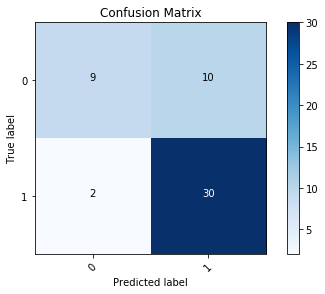

In [19]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, grid_search.predict(X_test)), classes=[0,1], normalize=False,
                      title='Confusion Matrix')

# Coba dengan CNN 

In [13]:
import wandb
from wandb.keras import WandbCallback

wandb.init(project='brain-tumor-detection')

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['acc'])

wandb: Waiting for W&B process to finish, PID 3712
wandb: Program ended successfully.


wandb:                                                                                
wandb: Find user logs for this run at: wandb\run-20201021_173406-1vc4v410\logs\debug.log
wandb: Find internal logs for this run at: wandb\run-20201021_173406-1vc4v410\logs\debug-internal.log
wandb: Synced 4 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: 
wandb: Synced ancient-resonance-7: https://wandb.ai/shandytp/brain-tumor-detection/runs/1vc4v410
wandb: wandb version 0.10.7 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.10.2
wandb: Run data is saved locally in wandb\run-20201021_173432-2bddu6kh
wandb: Syncing run crisp-cloud-8


In [15]:
fit_history = model.fit(X_train, y_train, batch_size = 32, epochs = 20, validation_data=(X_test, y_test), callbacks=[WandbCallback()])

ValueError: Error when checking input: expected conv2d_input to have 4 dimensions, but got array with shape (202, 512)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), fit_history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), fit_history.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), fit_history.history["acc"], label="train_acc")
plt.plot(np.arange(0, 20), fit_history.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()